# **Projeto de Estatística** - Best Selling Albums By Duration (1990-2021)



> O objetivo deste trabalho é analisar a duração dos álbuns nos últimos anos, além de verificar em quais gêneros musicais essa mudança foi mais significante.


> Base de dados utilizada: https://www.kaggle.com/datasets/nickadair44/top-10-annual-best-selling-albums-by-length?resource=download



## **Fase inicial - Tratamento dos dados**



*   Importando a biblioteca do pandas (que irá manipular os dados da nossa base de dados)

In [ ]:
import pandas as pd



*   Importando a base de dados

In [ ]:
dados = pd.read_csv("/content/Top 10 Albums By Year Album Length - Sheet1.csv")
display(dados)

,Year,Ranking,Artist,Album,Worldwide Sales (Est.),CDs,Tracks,Album Length,Hours,Minutes,Seconds,Genre
0,2019,8,Arashi,5x20 All The Best!! 1999-2019,"3,300,000",4,67,5:04:02,5.07,304.03,18242,Pop
1,2017,8,Elton John,Diamonds,"3,220,000",2,34,2:35:47,2.60,155.78,9347,Rock
2,1995,4,Michael Jackson,"History: Past, Present & Future Book I","20,000,000",2,30,2:28:51,2.48,148.85,8931,Pop
3,2015,6,Broadway Soundtrack,Hamilton,"4,835,000",2,46,2:22:13,2.37,142.22,8533,Hip Hop
4,2003,10,Outkast,Speakerboxxx / The Love Below,"7,012,000",2,39,2:14:39,2.24,134.65,8079,Hip Hop
...,...,...,...,...,...,...,...,...,...,...,...,...
315,2009,10,Justin Bieber,My World,"3,980,000",1,7,0:25:58,0.43,25.97,1558,Pop
316,2019,9,R1SE,Going To Powerfully Burst,"3,080,507",1,7,0:25:22,0.42,25.37,1522,Pop
317,2020,9,Blackpink,The Album,"2,947,398",1,8,0:24:28,0.41,24.47,1468,Pop
318,2021,6,Cai Xukun,迷,"3,402,981",1,11,0:24:16,0.40,24.27,1456,Hip Hop



*   Verificando a existência de dados nulos na base e vendo as informações dos dados



In [ ]:
# verificando se existe numeros nulos
dados.isnull().sum()

Year                      0
Ranking                   0
Artist                    0
Album                     0
Worldwide Sales (Est.)    0
CDs                       0
Tracks                    0
Album Length              0
Hours                     0
Minutes                   0
Seconds                   0
Genre                     0
dtype: int64

In [ ]:
# verificando os tipos dos dados de cada coluna
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    320 non-null    int64  
 1   Ranking                 320 non-null    int64  
 2   Artist                  320 non-null    object 
 3   Album                   320 non-null    object 
 4   Worldwide Sales (Est.)  320 non-null    object 
 5   CDs                     320 non-null    int64  
 6   Tracks                  320 non-null    int64  
 7   Album Length            320 non-null    object 
 8   Hours                   320 non-null    float64
 9   Minutes                 320 non-null    float64
 10  Seconds                 320 non-null    int64  
 11  Genre                   320 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 30.1+ KB




*   Tratamento da base



In [ ]:
# renomeando a coluna para não dar erro
dados = dados.rename({'Album Length': 'Album_Length'}, axis = 1)

In [ ]:
# renomeando a coluna para não dar erro
dados = dados.rename({'Worldwide Sales (Est.)': 'Worldwide_Sales_Est'}, axis = 1)

In [ ]:
# convertendo tipo de string para float
dados["Worldwide_Sales_Est"] = dados["Worldwide_Sales_Est"].str.replace(',','').replace(',','.').astype(float)

In [ ]:
# verificando se a conversão deu certo
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 320 non-null    int64  
 1   Ranking              320 non-null    int64  
 2   Artist               320 non-null    object 
 3   Album                320 non-null    object 
 4   Worldwide_Sales_Est  320 non-null    float64
 5   CDs                  320 non-null    int64  
 6   Tracks               320 non-null    int64  
 7   Album_Length         320 non-null    object 
 8   Hours                320 non-null    float64
 9   Minutes              320 non-null    float64
 10  Seconds              320 non-null    int64  
 11  Genre                320 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 30.1+ KB


In [ ]:
# vendo de novo a base agora modificada
display(dados)

,Year,Ranking,Artist,Album,Worldwide_Sales_Est,CDs,Tracks,Album_Length,Hours,Minutes,Seconds,Genre
0,2019,8,Arashi,5x20 All The Best!! 1999-2019,3300000.0,4,67,5:04:02,5.07,304.03,18242,Pop
1,2017,8,Elton John,Diamonds,3220000.0,2,34,2:35:47,2.60,155.78,9347,Rock
2,1995,4,Michael Jackson,"History: Past, Present & Future Book I",20000000.0,2,30,2:28:51,2.48,148.85,8931,Pop
3,2015,6,Broadway Soundtrack,Hamilton,4835000.0,2,46,2:22:13,2.37,142.22,8533,Hip Hop
4,2003,10,Outkast,Speakerboxxx / The Love Below,7012000.0,2,39,2:14:39,2.24,134.65,8079,Hip Hop
...,...,...,...,...,...,...,...,...,...,...,...,...
315,2009,10,Justin Bieber,My World,3980000.0,1,7,0:25:58,0.43,25.97,1558,Pop
316,2019,9,R1SE,Going To Powerfully Burst,3080507.0,1,7,0:25:22,0.42,25.37,1522,Pop
317,2020,9,Blackpink,The Album,2947398.0,1,8,0:24:28,0.41,24.47,1468,Pop
318,2021,6,Cai Xukun,迷,3402981.0,1,11,0:24:16,0.40,24.27,1456,Hip Hop


## **Fase 2 - Manipulação das medidas descritivas e de dispersão dos dados**

In [ ]:
# vendo o resumo de todas as medidas descritivas dos dados
dados.describe()

,Year,Ranking,Worldwide_Sales_Est,CDs,Tracks,Hours,Minutes,Seconds
count,320.000000,320.00000,3.200000e+02,320.000000,320.000000,320.000000,320.000000,320.000000
mean,2005.500000,5.50000,1.070507e+07,1.043750,14.306250,0.941406,56.478500,3388.715625
std,9.247553,2.87678,7.555652e+06,0.246528,5.868995,0.382895,22.970109,1378.209812
min,1990.000000,1.00000,1.909009e+06,1.000000,6.000000,0.320000,19.430000,1166.000000
25%,1997.750000,3.00000,5.000000e+06,1.000000,12.000000,0.740000,44.137500,2648.250000
50%,2005.500000,5.50000,8.276933e+06,1.000000,13.000000,0.860000,51.555000,3093.500000
75%,2013.250000,8.00000,1.400000e+07,1.000000,15.000000,1.090000,65.112500,3906.750000
max,2021.000000,10.00000,4.500000e+07,4.000000,67.000000,5.070000,304.030000,18242.000000


In [ ]:
# média da duração dos álbuns ranking 1 em minutos
dados[dados.Ranking==1].Minutes.mean()

54.0

In [ ]:
# desvio padrão da duração dos álbuns ranking 1 em minutos
dados[dados.Ranking==1].Minutes.std()

11.711553435431517

In [ ]:
# média da duração de todos os álbuns em minutos
dados.Minutes.mean()

56.47850000000001

In [ ]:
# média da venda de todos os álbuns
dados["Worldwide_Sales_Est"].mean()

10705072.59375

In [ ]:
# média da venda de todos os álbuns ranking 1
dados[dados.Ranking==1].Worldwide_Sales_Est.mean()

20240107.9375

In [ ]:
# quantidade de álbuns por gênero
dados.Genre.value_counts()

Pop          136
Rock          86
Hip Hop       42
Country       22
R&B           21
World          6
Classical      4
Jazz           1
Blues          1
EDM            1
Name: Genre, dtype: int64

In [ ]:
# quais gêneros estão no ranking 1 dos álbuns dos últimos anos
dados[dados.Ranking==1].Genre.value_counts()

Pop        19
Rock        7
Hip Hop     3
R&B         2
Country     1
Name: Genre, dtype: int64

## **Fase 3 - Analisar os dados a partir dos gráficos**



*   Importando as bibliotecas necessárias


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# gerando um arquivo excel (xlsx) das medidas descritivas da duração por minutos dos álbuns agrupados por gênero
dados3 = dados.groupby(['Genre']).Minutes.describe().to_excel("tabela por gênero e duração do álbum.xlsx")

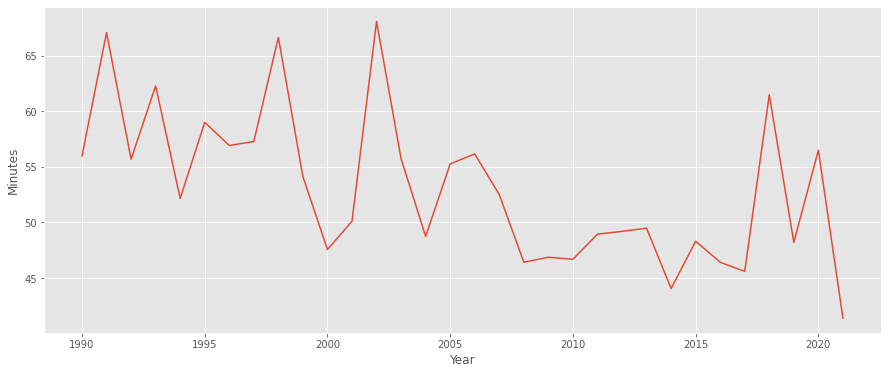

In [ ]:
# gráfico da média de duração em minutos de todos os álbuns por ano
dados2 = dados.groupby(['Year']).Minutes.median()
plt.figure(figsize=(15, 6))
plt.style.use('ggplot')
sns.lineplot(data=dados2) 
sns.set_context("paper")
plt.show()

In [ ]:
# média individual de cada ano
display(dados2)

Year
1990    55.985
1991    67.085
1992    55.690
1993    62.285
1994    52.165
1995    59.010
1996    56.930
1997    57.285
1998    66.650
1999    54.125
2000    47.565
2001    50.115
2002    68.085
2003    55.740
2004    48.750
2005    55.270
2006    56.165
2007    52.515
2008    46.425
2009    46.875
2010    46.690
2011    48.950
2012    49.200
2013    49.490
2014    44.060
2015    48.310
2016    46.425
2017    45.600
2018    61.490
2019    48.210
2020    56.500
2021    41.410
Name: Minutes, dtype: float64

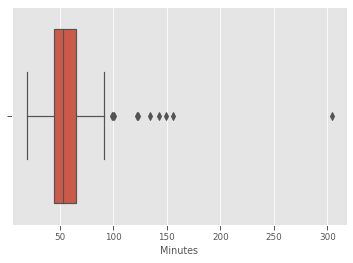

In [ ]:
# gráfico da duração em minutos dos álbuns ranking 3
sns.boxplot(x=dados[dados.Ranking>=3].Minutes)
plt.rcParams["figure.figsize"] = [11, 5]
plt.show()

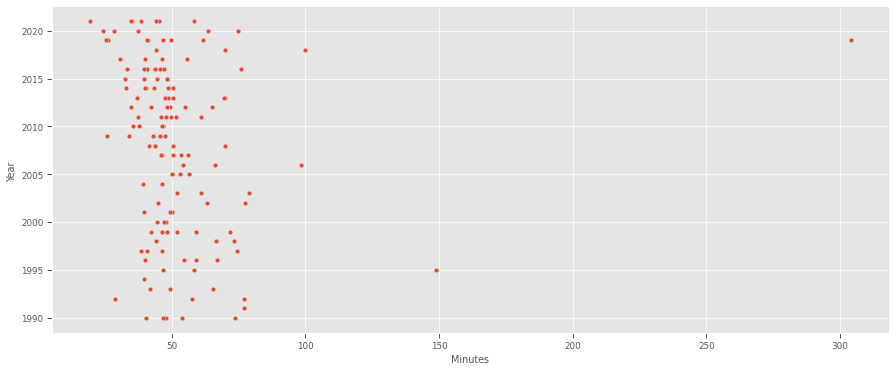

In [ ]:
# gráfico da duração dos álbuns pop em todos os anos analisados
dados3 = dados[dados.Genre=="Pop"]
plt.figure(figsize=(15, 6))
sns.scatterplot(data=dados3, x="Minutes", y="Year")
plt.show()